In [1]:
import shutil
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import os
import requests
import sklearn as sc
from zipfile import ZipFile
import category_encoders as ce
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import collections
from scipy import stats
import matplotlib.ticker as mtick

In [2]:
#Simple Imputer
from sklearn.impute import SimpleImputer

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
df = pd.read_csv('CC GENERAL.csv', encoding='utf-8')

#(file, delimiter = ";")

### Data Understanding

In [5]:
df.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [6]:
df.shape

(8950, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
df.isnull().sum()
#df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
df.set_index('CUST_ID', inplace = True)

In [10]:
# Summary statistics for all variables
summary=df.describe(include='all')
summary=summary.transpose()
summary.head(len(summary))

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [15]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## Data Preparation

In [16]:
# Create a modeling dataset from the original dataset
X = df.copy(deep=True)

In [17]:
#Find Duplicated Rows

duplicate = X[X.duplicated()] 
  
print("Duplicate Rows :") 
  
# Print the resultant Dataframe 
duplicate 

Duplicate Rows :


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,


#### Outliers

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

In [19]:
#Copy of DataSet

X_Safe = X
X = df

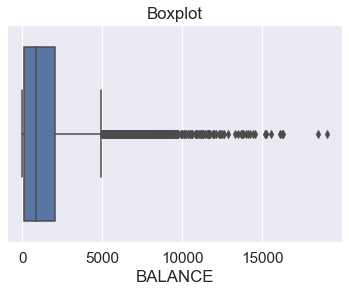

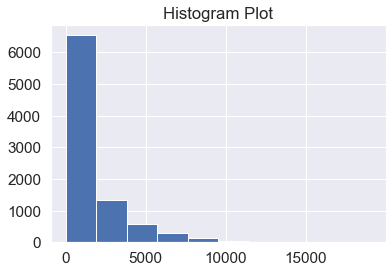

In [20]:
#Balance

Field = 'BALANCE'

#Plot data prior to the transformation
sns.boxplot(X[Field])
plt.title("Boxplot")
plt.show()

X.hist(column=Field,bins= 10)
plt.title("Histogram Plot")
plt.show()

In [21]:
#Cut-off value
Value = 10000

Z = X[(X[Field] > Value)]
Z.shape
print('This much of the data would be out:', Z.shape[0], 'observation', (Z.shape[0]/X.shape[0])*100, 'percent')
X = X[(X[Field] < Value)]

#OUTLIER DATASET
Keep_Extreme_Values = Z

This much of the data would be out: 66 observation 0.7374301675977654 percent


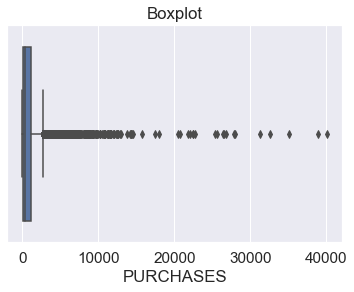

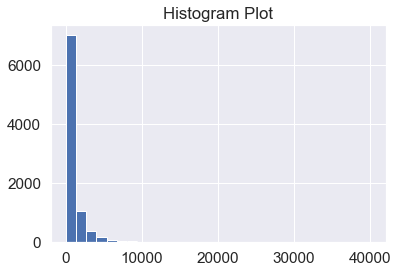

In [22]:
#PURCHASES

Field = 'PURCHASES'

#Plot data prior to the transformation
sns.boxplot(X[Field])
plt.title("Boxplot")
plt.show()

X.hist(column=Field,bins= 30)
plt.title("Histogram Plot")
plt.show()

In [23]:
#Cut-off value
Value = 10000

Z = X[(X[Field] > Value)]
Z.shape
print('This much of the data would be out:', Z.shape[0], 'observation', (Z.shape[0]/X.shape[0])*100, 'percent')
X = X[(X[Field] < Value)]

#OUTLIER DATASET
Keep_Extreme_Values = Z + Keep_Extreme_Values

This much of the data would be out: 62 observation 0.6978838361098605 percent


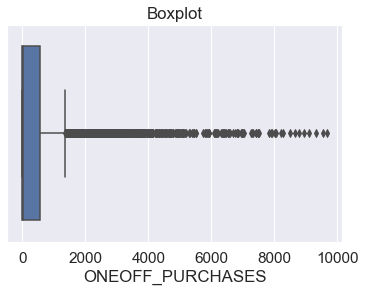

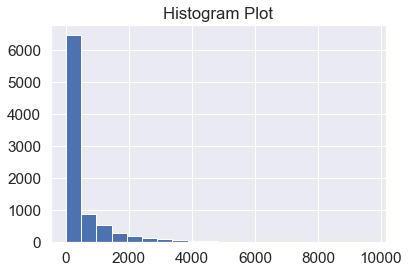

In [24]:
#ONEOFF_PURCHASES

Field = 'ONEOFF_PURCHASES'

#Plot data prior to the transformation
sns.boxplot(X[Field])
plt.title("Boxplot")
plt.show()

X.hist(column=Field,bins= 20)
plt.title("Histogram Plot")
plt.show()

In [25]:
#Cut-off value
Value = 10000

Z = X[(X[Field] > Value)]
Z.shape
print('This much of the data would be out:', Z.shape[0], 'observation', (Z.shape[0]/X.shape[0])*100, 'percent')
X = X[(X[Field] < Value)]

#OUTLIER DATASET
Keep_Extreme_Values = Z + Keep_Extreme_Values

This much of the data would be out: 0 observation 0.0 percent


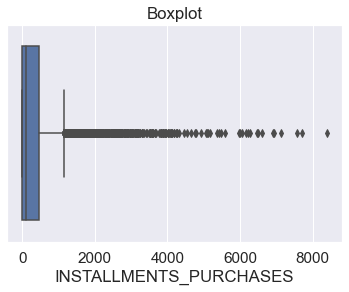

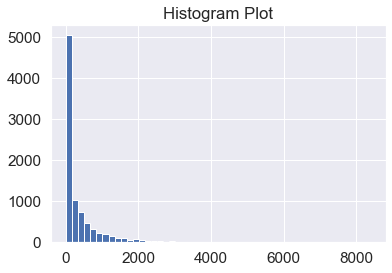

In [26]:
#INSTALLMENTS_PURCHASES

Field = 'INSTALLMENTS_PURCHASES'

#Plot data prior to the transformation
sns.boxplot(X[Field])
plt.title("Boxplot")
plt.show()

X.hist(column=Field,bins= 50)
plt.title("Histogram Plot")
plt.show()

In [27]:
#Cut-off value
Value = 6000

Z = X[(X[Field] > Value)]
Z.shape
print('This much of the data would be out:', Z.shape[0], 'observation', (Z.shape[0]/X.shape[0])*100, 'percent')
X = X[(X[Field] < Value)]

#OUTLIER DATASET
Keep_Extreme_Values = Z + Keep_Extreme_Values

This much of the data would be out: 13 observation 0.14735887553842666 percent


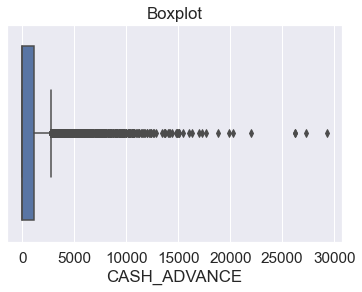

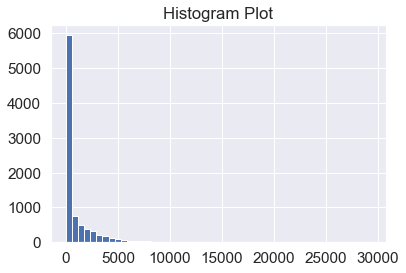

In [28]:
#CASH_ADVANCE

Field = 'CASH_ADVANCE'

#Plot data prior to the transformation
sns.boxplot(X[Field])
plt.title("Boxplot")
plt.show()

X.hist(column=Field,bins= 50)
plt.title("Histogram Plot")
plt.show()

In [29]:
#Cut-off value
Value = 17000

Z = X[(X[Field] > Value)]
Z.shape
print('This much of the data would be out:', Z.shape[0], 'observation', (Z.shape[0]/X.shape[0])*100, 'percent')
X = X[(X[Field] < Value)]

#OUTLIER DATASET
Keep_Extreme_Values = Z + Keep_Extreme_Values

This much of the data would be out: 10 observation 0.11352026336701102 percent


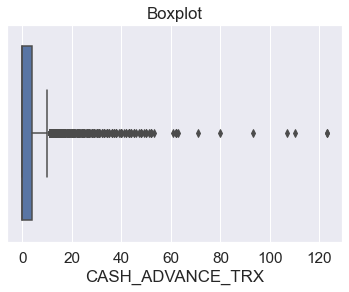

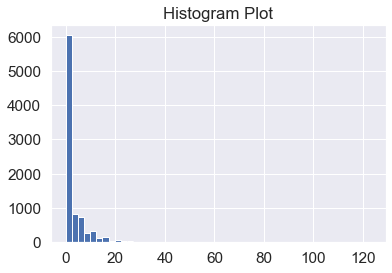

In [30]:
#CASH_ADVANCE_TRX

Field = 'CASH_ADVANCE_TRX'

#Plot data prior to the transformation
sns.boxplot(X[Field])
plt.title("Boxplot")
plt.show()

X.hist(column=Field,bins= 50)
plt.title("Histogram Plot")
plt.show()

In [31]:
#Cut-off value
Value = 60

Z = X[(X[Field] > Value)]
Z.shape
print('This much of the data would be out:', Z.shape[0], 'observation', (Z.shape[0]/X.shape[0])*100, 'percent')
X = X[(X[Field] < Value)]

#OUTLIER DATASET
Keep_Extreme_Values = Z + Keep_Extreme_Values

This much of the data would be out: 12 observation 0.13637913399249915 percent


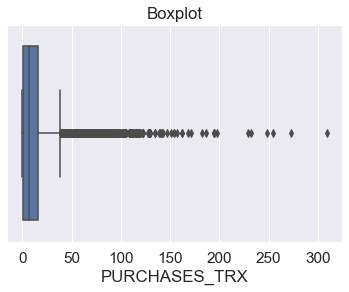

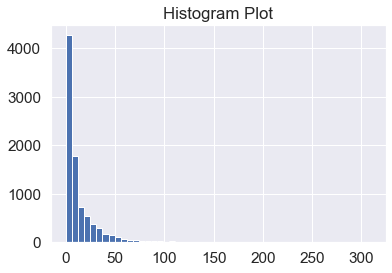

In [32]:
#PURCHASES_TRX

Field = 'PURCHASES_TRX'

#Plot data prior to the transformation
sns.boxplot(X[Field])
plt.title("Boxplot")
plt.show()

X.hist(column=Field,bins= 50)
plt.title("Histogram Plot")
plt.show()

In [33]:
#Cut-off value
Value = 200

Z = X[(X[Field] > Value)]
Z.shape
print('This much of the data would be out:', Z.shape[0], 'observation', (Z.shape[0]/X.shape[0])*100, 'percent')
X = X[(X[Field] < Value)]

#OUTLIER DATASET
Keep_Extreme_Values = Z + Keep_Extreme_Values

This much of the data would be out: 6 observation 0.06828269033799932 percent


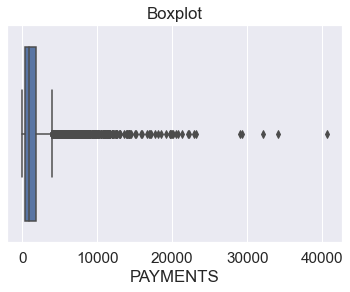

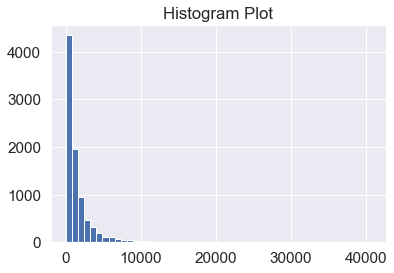

In [34]:
#PAYMENTS

Field = 'PAYMENTS'

#Plot data prior to the transformation
sns.boxplot(X[Field])
plt.title("Boxplot")
plt.show()

X.hist(column=Field,bins= 50)
plt.title("Histogram Plot")
plt.show()

In [35]:
#Cut-off value
Value = 25000

Z = X[(X[Field] > Value)]
Z.shape
print('This much of the data would be out:', Z.shape[0], 'observation', (Z.shape[0]/X.shape[0])*100, 'percent')
X = X[(X[Field] < Value)]

#OUTLIER DATASET
Keep_Extreme_Values = Z + Keep_Extreme_Values

This much of the data would be out: 5 observation 0.05694112287894318 percent


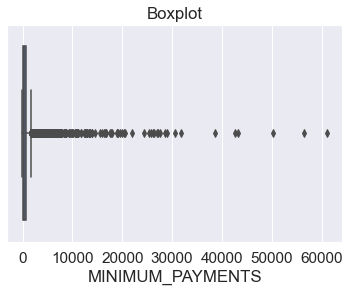

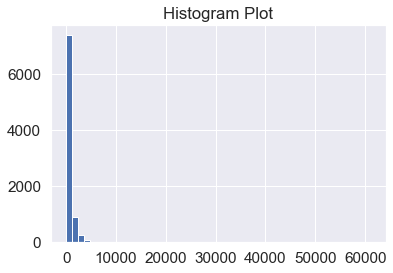

In [36]:
#MINIMUM_PAYMENTS


#TECHNICAL Replace Missing Value to avoid missing
X['MINIMUM_PAYMENTS'].fillna(value = -50, inplace = True)

Field = 'MINIMUM_PAYMENTS'

#Plot data prior to the transformation
sns.boxplot(X[Field])
plt.title("Boxplot")
plt.show()

X.hist(column=Field,bins= 50)
plt.title("Histogram Plot")
plt.show()

In [37]:
#Cut-off value
Value = 30000

Z = X[(X[Field] > Value)]
Z.shape
print('This much of the data would be out:', Z.shape[0], 'observation', (Z.shape[0]/X.shape[0])*100, 'percent')
X = X[(X[Field] < Value)]


#TECHNICAL Replace BACK Missing Value fo Nan
X['MINIMUM_PAYMENTS'] = X['MINIMUM_PAYMENTS'].replace([-50],np.NaN) 

#OUTLIER DATASET
Keep_Extreme_Values = Z + Keep_Extreme_Values

This much of the data would be out: 8 observation 0.09115770282588878 percent


In [38]:
#Data Missing Report

missing = df.shape[0] - X.shape[0]
print('We lose',missing, 'observations for the model')
print('That is',missing / df.shape[0] * 100,'%')

We lose 182 observations for the model
That is 2.033519553072626 %


In [39]:
#OUTLIER DATASET
Keep_Extreme_Values.shape

(182, 17)

#### Missing Values Imputation

In [40]:
X.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    312
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

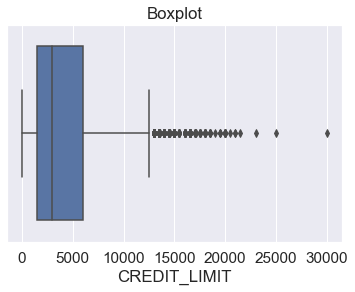

In [41]:
#CREDIT_LIMIT

#Plot data prior to the transformation
sns.boxplot(X['CREDIT_LIMIT'])
plt.title("Boxplot")
plt.show()

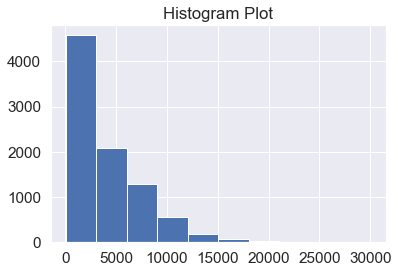

In [42]:
X.hist(column='CREDIT_LIMIT')
plt.title("Histogram Plot")
plt.show()

In [43]:
#As it is one value and not a normal distribution, input median

median = X['CREDIT_LIMIT'].median()
X['CREDIT_LIMIT'].fillna(value = median, inplace = True)

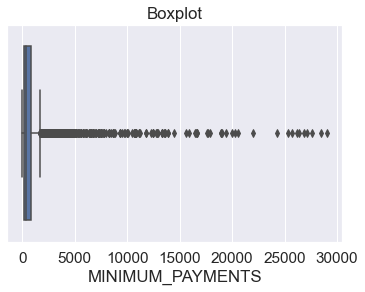

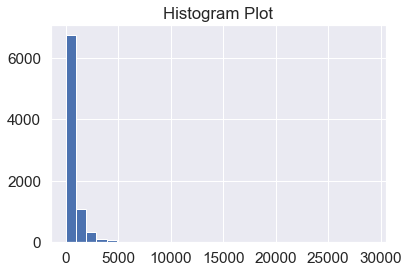

In [44]:
# MINIMUM_PAYMENTS

#Plot data prior to the transformation
    
sns.boxplot(X['MINIMUM_PAYMENTS'])
plt.title("Boxplot")
plt.show()

X.hist(column='MINIMUM_PAYMENTS', bins= 30)
plt.title("Histogram Plot")
plt.show()

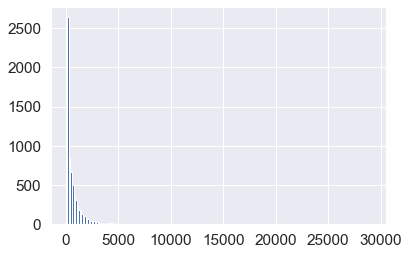

In [45]:
plt.hist(X['MINIMUM_PAYMENTS'],bins= 200)
plt.show()

In [46]:
#Check if there's any reason behind the missing values

#Creating DF X_only_Missing with all the missing values

X_only_Missing = X[X.isnull().any(axis=1)]
X_only_Missing.shape

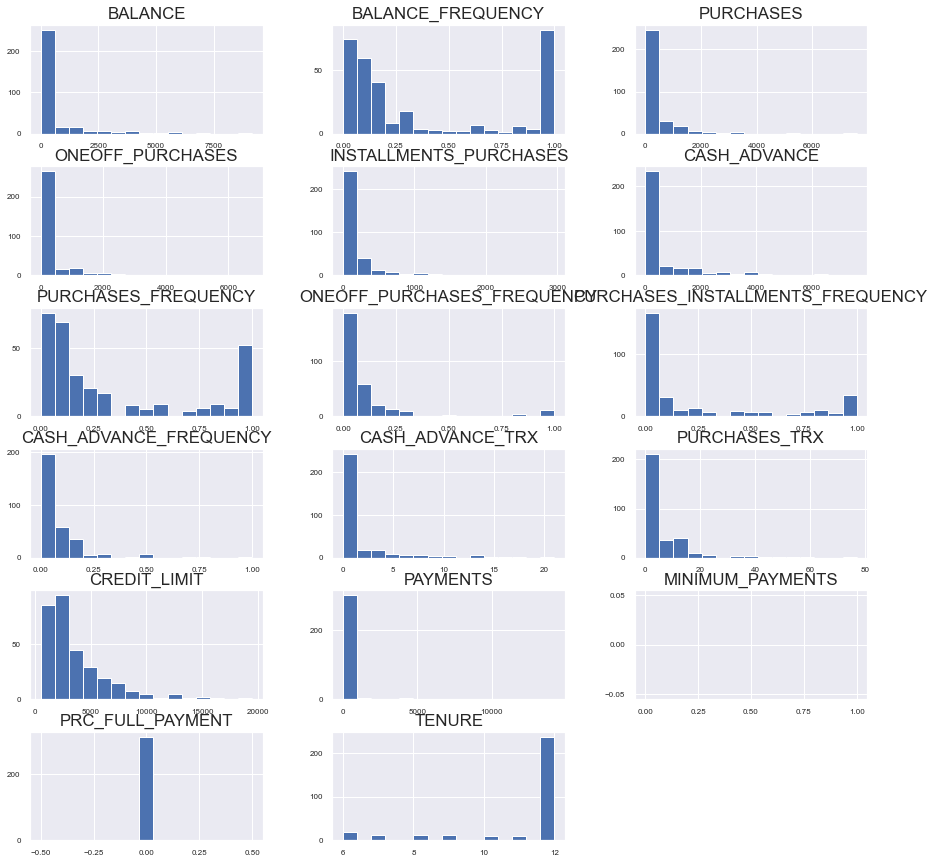

In [48]:
# Do histograms on all numeric variables to check if there's a pattern in why we have missing values

numerical=X_only_Missing.select_dtypes(include=[np.number]).columns.tolist()
X_only_Missing[numerical].hist(bins=15, figsize=(15, 15), layout=(6, 3), xlabelsize=8, ylabelsize=8);

In [49]:
#Missing values seem to be missing at random

In [50]:
#Test inputing missing values using KNN

from sklearn.impute import KNNImputer

scaler = MinMaxScaler()
df1 = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
df1.head()

imputer = KNNImputer(n_neighbors=5)
df1 = pd.DataFrame(imputer.fit_transform(df1),columns = df1.columns)

df1.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64